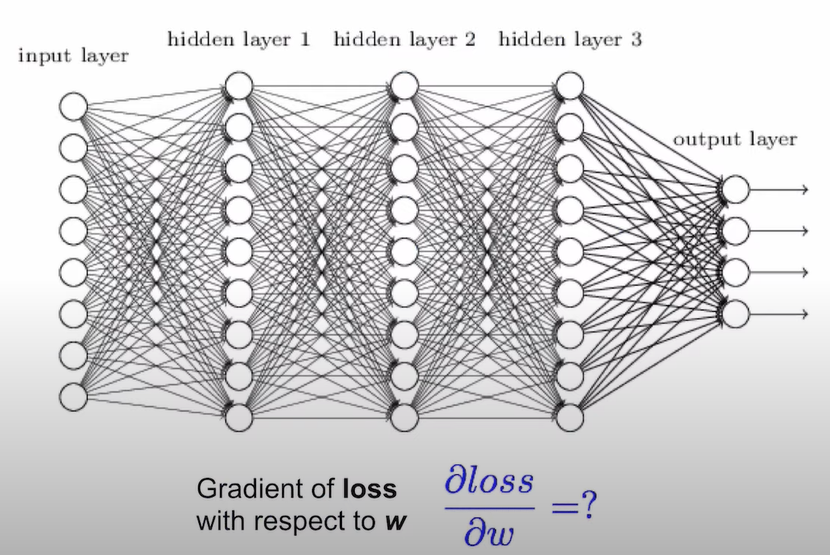

- 위와 같이 매우 복잡한 경우 w 값을 구하는 것은 어렵거나, 불가능에 가깝다.

## Chain Rule
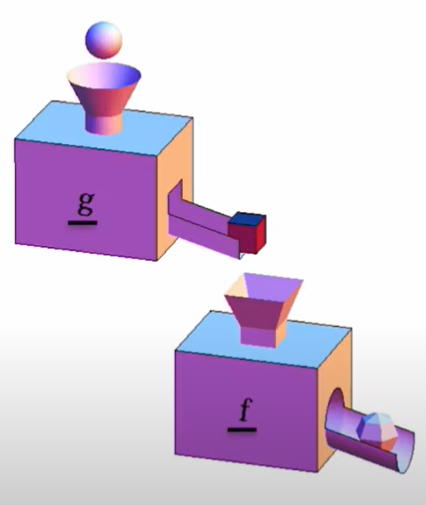

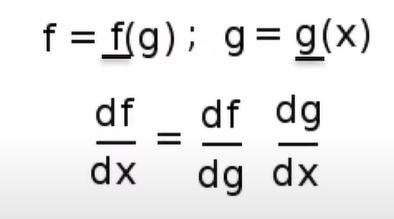

- Chain rule을 적용해서 **전체를 구하는 것이 아니라 각각을 따로 구한 후 추후 결합**해서 전체적인 것을 계산할 수 있다.

> 이것이 **Chain rule 또는 Backpropagation**이다.

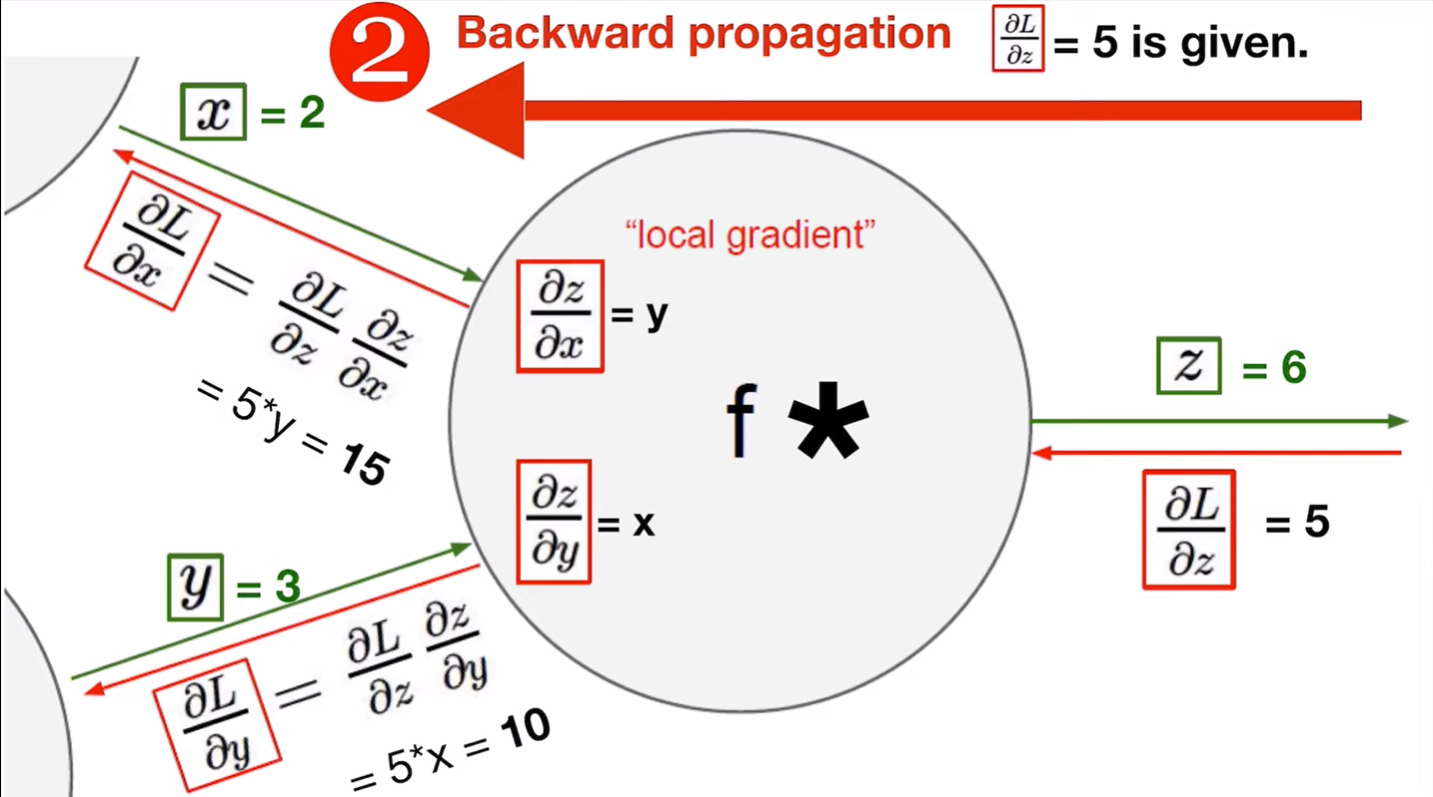

In [1]:
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]), requires_grad = True)

In [2]:
def forward(x):
    return w*x

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2

print("predict (before training)", 4, forward(4).data[0])

predict (before training) 4 tensor(4.)


In [3]:
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        # 1. loss 계산. (forward)
        l = loss(x_val, y_val)
        # 2. back propagation 계산
        l.backward() # backward propagation -> w.grad.data 를 얻는다.
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        # 3. w 값 update
        w.data = w.data - 0.01*w.grad.data
        # 4. 전부 0으로 초기화. 이전에 축적된 것들이 사용되지 않도록.(Fills self tensor with zeros.)
        w.grad.data.zero_()
    
    print("progress:", epoch, l.data[0])

print("predict (after training)", 4, forward(4).data[0])

	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad:  1.0 2.0 te

### Forward pass

```
w = Variable(torch.Tensor([1.0]), require_grad = True)
l = loss(x = 1, y = 2)
```

### Back propagation : l.backward()
```
w.grad
```


### Weight update(step)
```
w.data = w.data - 0.01 * w.grad.data
```
- learning_rate = 0.01

Numpy로 이런 것들을 쉽게 구현할 수 있다.